# Minimal Example

In [1]:
import numpy as np
import pandas as pd
from nilearn import plotting, image
import nibabel as nb
from nilearn.input_data import NiftiMasker
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)

In [2]:
beta_example = 'MVPA/sub-05/beta_0021.nii'
mask_fname = 'MVPA/mask_Left_AnG_angular_gyrus.nii'

(79, 95, 79)
float32
[[[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]]
17.519018173217773
1.4918233206712568


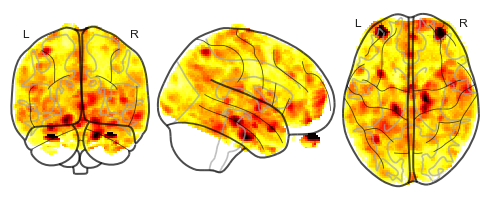

In [3]:
x = nb.load(beta_example)
data = x.get_fdata()
print(x.shape)
print(x.get_data_dtype())
print(data[:2])
print(np.nanmax(data)) # it isn't all nan although it looks like it
print(np.nanmean(data))
plotting.plot_glass_brain(beta_example) # image looks fine

## Recreating the error/warning faced with all other beta images

In [4]:
masker = NiftiMasker(mask_img=mask_fname, standardize=True)
fmri_masked = masker.fit_transform(beta_example) # mask it

C:\Users\L\AppData\Roaming\Python\Python37\site-packages\nilearn\image\resampling.py:584: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_value=fill_value)
C:\Users\L\AppData\Roaming\Python\Python37\site-packages\nilearn\image\resampling.py:591: RuntimeWarning: invalid value encountered in greater
  vmin = min(data.min(), 0)
C:\Users\L\AppData\Roaming\Python\Python37\site-packages\nilearn\image\resampling.py:592: RuntimeWarning: invalid value encountered in less
  vmax = max(data.max(), 0)
C:\Users\L\AppData\Roaming\Python\Python37\site-packages\nilearn\signal.py:61: UserWarning: Standardization of 3D signal has been requested but would lead to zero values. Skipping.
  warnings.warn('Standardization of 3D signal has been requested but '


In [5]:
# Not impoartant, just getting the beta filenames

behavioural_data = "MVPA/sub-05/all_hits.csv"

df = pd.read_csv(behavioural_data)

# Clean out the unnececssary cols
df = df[['subject', 'write_time', 'block_order', 'trial', 
         'attention_mode', 'onsets_s', 'confidence',
         'response_ttime', 'trialtot', 'condition_trial', 'beta_fname']]

all_betas = [f"MVPA/sub-05/{i}" for i in df['beta_fname'].to_list()] # get the beta names
all_betas[:5]

['MVPA/sub-05/beta_0001.nii',
 'MVPA/sub-05/beta_0002.nii',
 'MVPA/sub-05/beta_0003.nii',
 'MVPA/sub-05/beta_0004.nii',
 'MVPA/sub-05/beta_0005.nii']

## Running `clean_img()` on list of beta filenames

In [6]:
p = image.clean_img(imgs=all_betas)

C:\Users\L\AppData\Roaming\Python\Python37\site-packages\nilearn\signal.py:71: RuntimeWarning: invalid value encountered in less
  std[std < np.finfo(np.float).eps] = 1.  # avoid numerical problems


In [7]:
print(p.get_fdata().shape)
print(np.nanmean(p.get_fdata()))
print(np.nanmax(p.get_fdata()))

(79, 95, 79, 82)
-3.3625808977264304e-12
6.568410873413086


In [8]:
p.get_fdata()

array([[[[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        ...,

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan